# **MLPP25 // Assignment #5**

assigned : **Apr 2, 2025**

DUE : **Apr 9, 2025 11:59pm**

## Diabetes Risk: Predicting Outcomes in Homogeneous Populations

<img src="https://images.squarespace-cdn.com/content/v1/5a21a88bcd39c3ec782756ed/1519148471554-P8KM1H55H4ZXM3QWC2EJ/Diabetes12.jpg?format=2500w" width=500>

---

This notebook will use Logistic Regression to attempt to predict diabetes from recorded health data in the Pima population in AZ.  The data is available [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database/activity) and a description of a long term diabetes study involving this population can be found [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4418458/).  *Answering the questions below will require that you read through the content of these links in detail.*

<b>

How to complete and submit assignments:

1. Please make a copy of this notebook in your Google Drive and add your name to the filename.

2. Once you have completed the notebook, please share it with me before the due date and time by clicking the "Share" button in the upper right corner of the notebook.

Rules for assignments:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed below.  Direct copying from someone else's notebook is not permitted.

2. You may use generative AI models (e.g., ChatGPT) to help complete the assignment but if you do, bear in mind that such models <u>often</u> yield incorrect solutions.

3. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

4. Late assignments will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

NONE

---

### **Part 1: Loading and Parsing the Data**

**Load the study data from the `mlpp25/data/diabetes/` folder.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the dataset
data_diab = pd.read_csv('/content/drive/Shareddrives/mlpp25/data/diabetes/diabetes.csv')

# Display the first few rows
data_diab.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Display the contents of this data and describe <u>in your own words</u> what the content of each column is, including units where appropriate.**

In [3]:
# Display basic info
data_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies: Number of times the individual has been pregnant.
Unit: count

Glucose:  Blood glucose level from a glucose tolerance test. If it is high, it means the person has high blood sugar levels.
Unit: mg/dL

BloodPressure: Diastolic blood pressure (lower value in a blood pressure reading).
Unit: mm Hg

SkinThickness: Measurement of the triceps skinfold, used as an indicator of body fat levels.
Unit: mm

Insulin: 2-hour serum insulin level.
Unit: µU/mL (micro units per milliliter)

BMI: Body Mass Index, calculated as weight (kg) divided by height squared (m²).
Unit: kg/m²

DiabetesPedigreeFunction: A score indicating the hereditary risk of diabetes based on family history.
Unit: Unitless

Age: Age of the individual.
Unit: years

Outcome: Indicates whether the person has diabetes (1) or not (0).
Binary label

**Make a 3x3 panel plot with the histograms of each of the nine columns.**

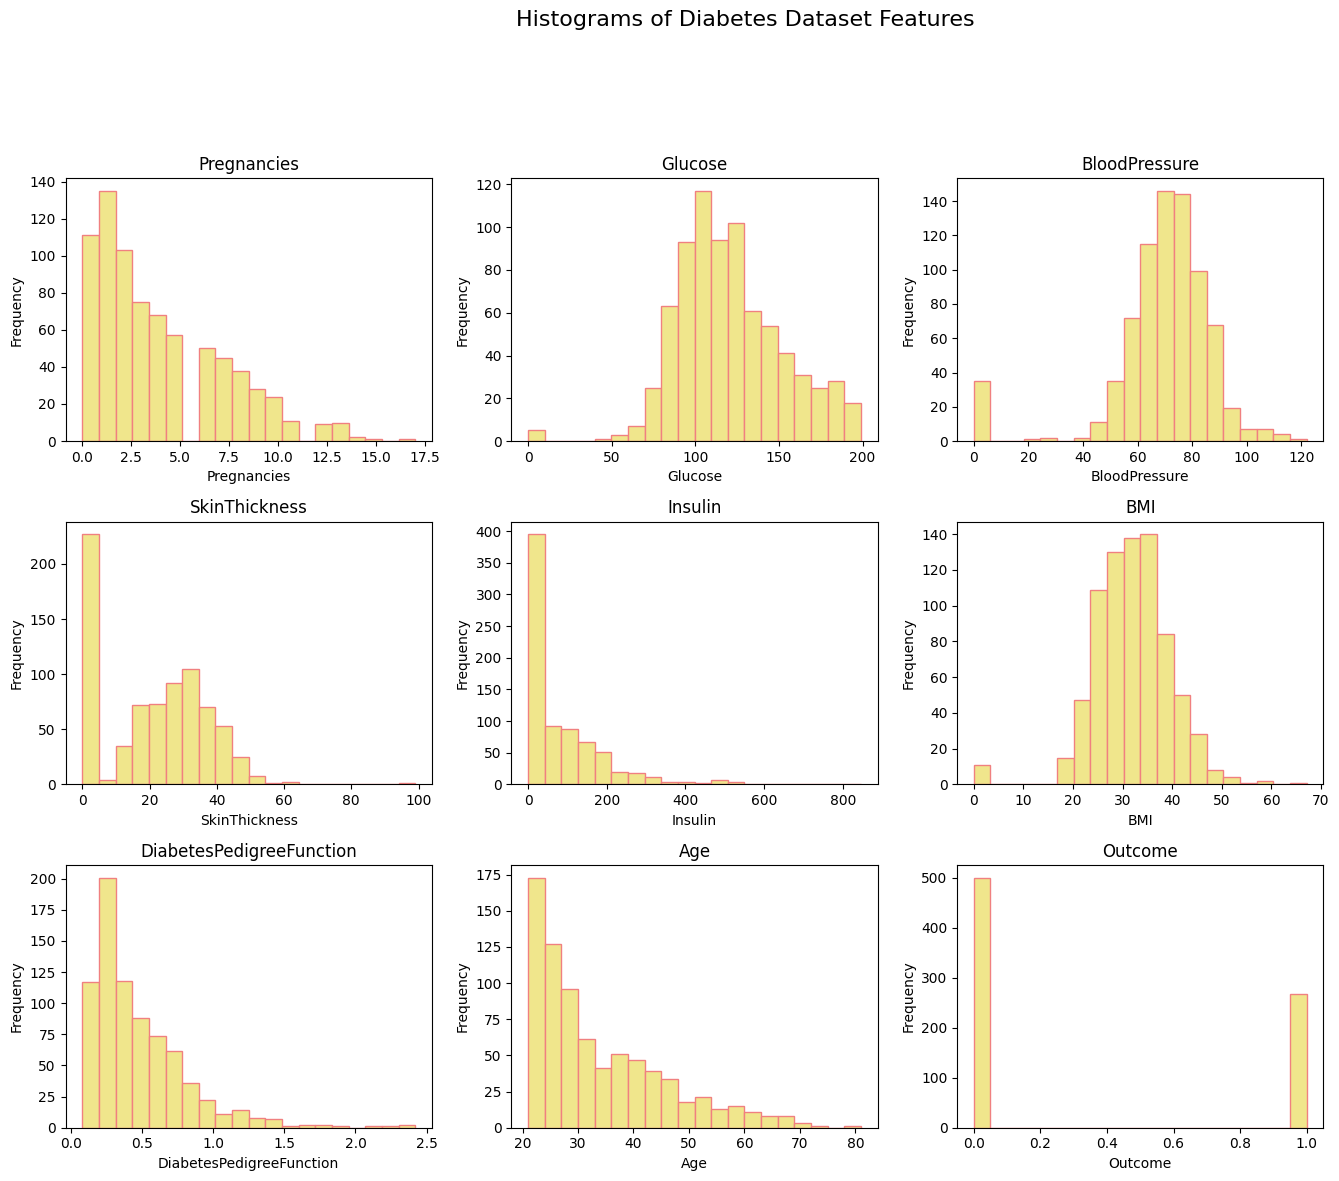

In [26]:
import matplotlib.pyplot as plt

# Set up the 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Histograms of Diabetes Dataset Features', fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms
for i, column in enumerate(data_diab.columns):
    axes[i].hist(data_diab[column], bins=20, color='khaki', edgecolor='lightcoral')
    axes[i].set_title(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel(column)

plt.tight_layout(rect=[0, 0, 0.9, 0.9])  # Adjust layout to make room for suptitle
plt.show()


**Describe what information you can infer from each histogram in this plot.**

1. Pregnancies

Most of the individuals had fewer than 5 pregnancies, there are very rare cases with more than 10 pregnancies.
The distribution is right-skewed, which means that fewer people had many pregnancies.

2. Glucose

This is a roughly normal distribution centered around 120 mg/dL.
A few outliers with very high glucose levels which suggests a risk group.
People with very low glucose are relatively rare, which is possibly because of missing or erroneous data.

3. BloodPressure

Most blood pressure readings fall between 60 and 80 mm Hg.
The distribution is bell-shaped but with some zero values, which are medically implausible and likely indicate missing or faulty data.

4. SkinThickness

Distribution is right-skewed with a spike at 0, which may indicate missing values.
Most measurements are between 10 and 40 mm, with a peak around 20 mm.
Extreme values (>60 mm) are rare.

5. Insulin

Strongly right-skewed with a large spike at 0, indicating many missing or unrecorded values.
Non-zero values spread widely from 0 to over 800 µU/mL, though most lie under 200.
Very high values are uncommon.

6. BMI

BMI follows a roughly normal distribution centered around 30 kg/m².
Values below 10 and above 60 are rare.
A peak near 30 may suggest many individuals are in the overweight or obese range.

7. DiabetesPedigreeFunction

Right-skewed distribution: most values are under 1.0.
A few people have very high hereditary diabetes risk (>2.0).
Indicates family history varies widely but is generally low for most.

8. Age

Most individuals are between 20 and 40 years old.
The distribution decreases gradually after 40, with very few above 70.
Suggests the dataset skews toward a younger to middle-aged population.

9. Outcome

Binary distribution (0 or 1).
0 (no diabetes) is more common than 1 (diabetes), indicating a class imbalance.

**Remove rows for which the values of any of the columns are not physically possible (e.g., it is not possible to have a BMI of $0$).**

In [15]:
# List of columns where zero values are not physically plausible
columns_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Remove rows where any of those columns have zero values
data_diab_filtered = data_diab.copy()
for col in columns_with_invalid_zeros:
    data_diab_filtered = data_diab_filtered[data_diab_filtered[col] != 0]

data_diab_filtered

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


**Re-plot the 3x3 panel plot of histograms with this new subset of the data.**

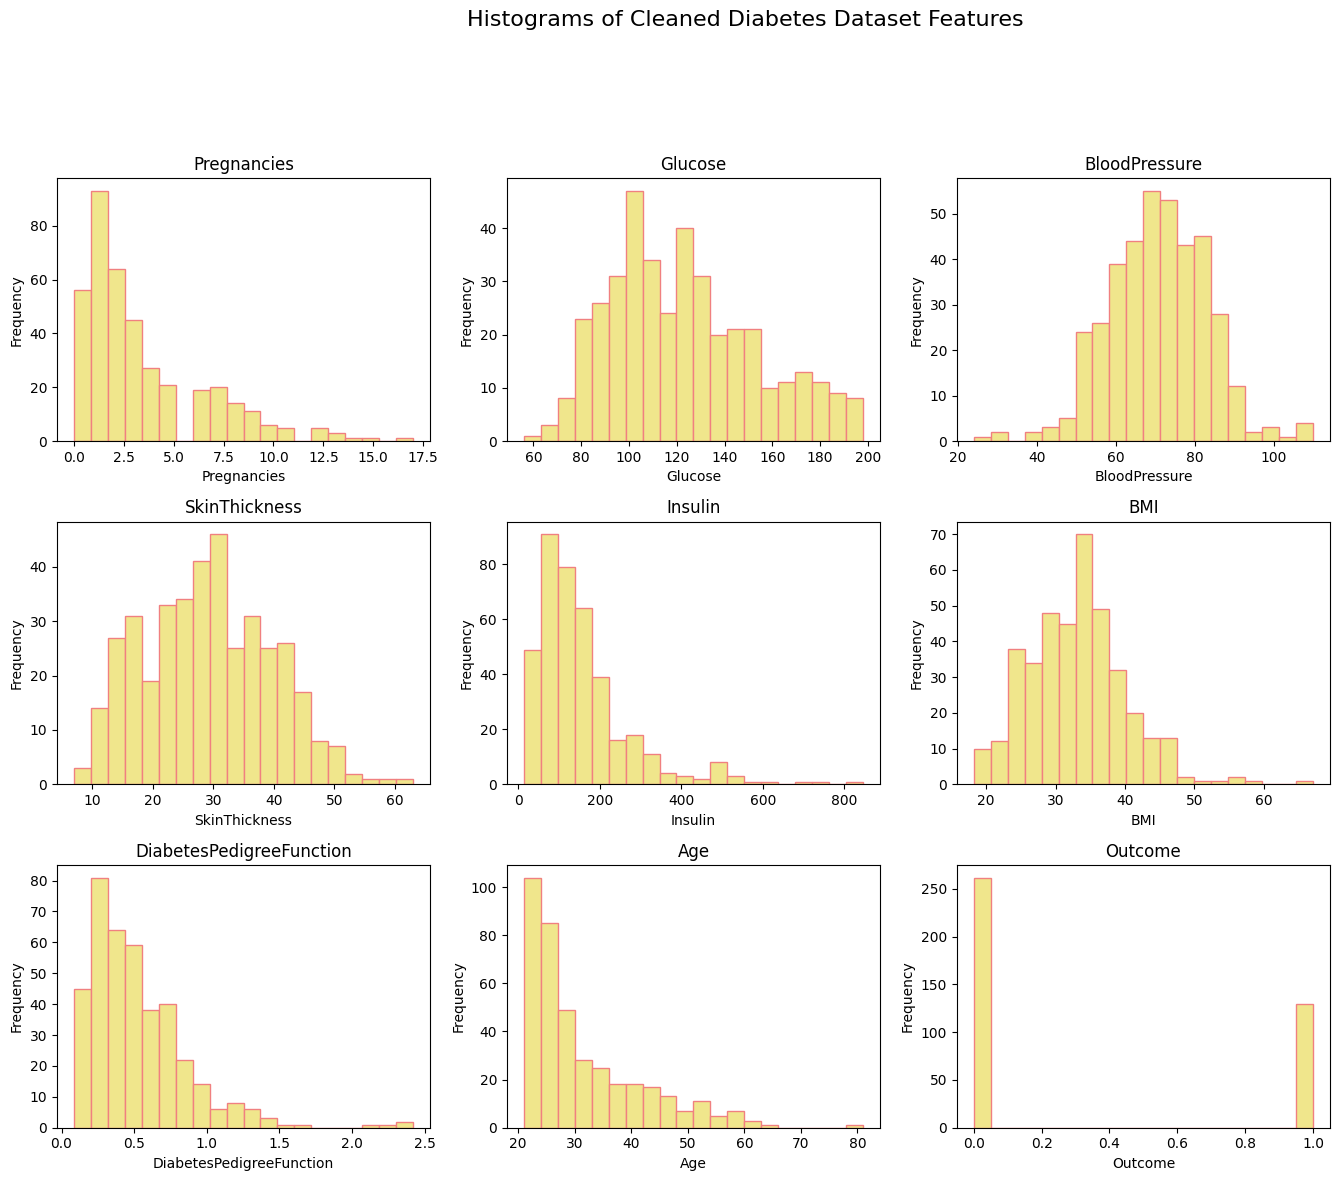

In [28]:
# Set up the 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Histograms of Cleaned Diabetes Dataset Features', fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(data_diab_filtered.columns):
    axes[i].hist(data_diab_filtered[column], bins=20, color='khaki', edgecolor='lightcoral')
    axes[i].set_title(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel(column)

plt.tight_layout(rect=[0, 0, 0.9, 0.9])
plt.show()


## **Part 2: Fitting a Logistic Regression Model**

First, let's run a logistic regression model on a single feature.

**Create features and targets objects from the subset of the data that you created above where the features are only blood pressure and the target is the outcome.**

In [29]:
# Define feature and target from the cleaned dataset
features = data_diab_filtered[['BloodPressure']]
targets = data_diab_filtered['Outcome']

**Instantiate and fit a logistic regression model to this feature and target using `sklearn`'s `LogisticRegression`.**

In [30]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logistic_regr = LogisticRegression()

# Fit the model to the data
logistic_regr.fit(features, targets)

LogisticRegression()

<b>

Use `plotly` to make a scatter plot of blood pressure vs outcome that contains

- the raw data using black points with an alpha (transparency) value of $0.2$;
- the logistic regression model predictions using blue points that are slightly smaller than the raw data points; and
- the best fit probabilty curve (i.e., the logistic function) from the logistic regression model.

</b>

In [32]:
import plotly.graph_objects as go
import numpy as np

# Sort values for plotting smooth probability curve
sorted_bp = np.linspace(features['BloodPressure'].min(), features['BloodPressure'].max(), 300).reshape(-1, 1)
probabilities = logistic_regr.predict_proba(sorted_bp)[:, 1]

# Create figure
fig = go.Figure()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [33]:
#(1)raw data using black points
fig.add_trace(go.Scatter(
    x=features['BloodPressure'],
    y=targets,
    mode='markers',
    marker=dict(color='black', size=8, opacity=0.2),
    name='Raw Data'
))

In [34]:
#(2) Model predictions (blue, slightly smaller)
preds = logistic_regr.predict(features)
fig.add_trace(go.Scatter(
    x=features['BloodPressure'],
    y=preds,
    mode='markers',
    marker=dict(color='blue', size=5),
    name='Model Predictions'
))

In [35]:
#(3) Probability curve (logistic regression fit)
fig.add_trace(go.Scatter(
    x=sorted_bp.flatten(),
    y=probabilities,
    mode='lines',
    line=dict(color='green', width=2),
    name='Probability Curve'
))

# Layout adjustments
fig.update_layout(
    title='Logistic Regression: Blood Pressure vs Diabetes Outcome',
    xaxis_title='Blood Pressure (mm Hg)',
    yaxis_title='Outcome / Probability',
    legend=dict(x=0.7, y=0.3),
    height=500,
    width=800
)

fig.show()

**Discuss what you can infer from this plot.**

This plot illustrates the relationship between blood pressure and the likelihood of having diabetes, as modeled by logistic regression.

The raw data points (in black) are spread across the full range of blood pressure values for both diabetic and non-diabetic individuals, indicating a significant overlap between the two classes.

The model predictions (blue points) mostly classify individuals as non-diabetic, except at higher blood pressure values where it occasionally predicts diabetes.

The green curve represents the logistic regression model’s estimated probability of having diabetes based on blood pressure.

It shows a gradual increase in risk as blood pressure rises, but the slope is relatively shallow, suggesting that blood pressure alone is not a strong predictor of diabetes in this dataset.

Overall, while there is a mild positive relationship between blood pressure and diabetes risk, the model struggles to distinguish between the classes using only this feature. This is likely due to both the class imbalance (more non-diabetic cases) and the weak discriminative power of blood pressure alone. To improve prediction accuracy, it would be beneficial to include additional features such as glucose levels, BMI, or age.

**Calculate the accuracy of this model by counting the number of target values that were correctly predicted and dividing by the total number of target values.**

In [36]:
# Make predictions on the training data
predictions = logistic_regr.predict(features)

# Calculate accuracy manually
correct_predictions = (predictions == targets).sum()
total_predictions = len(targets)
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.6760


Now let's fit a model that uses all features.

**Instantiate and fit a logistic regression model that uses all available features to predict the outcome.**

In [37]:
from sklearn.linear_model import LogisticRegression

# Define features and target
X_all = data_diab_filtered.drop(columns='Outcome')  # All columns except the target
y_all = data_diab_filtered['Outcome']

# Instantiate and fit the model
logistic_regr_all = LogisticRegression(max_iter=1000)
logistic_regr_all.fit(X_all, y_all)

LogisticRegression(max_iter=1000)

**Calculate the accuracy for this model.**

In [38]:
# Make predictions using the model trained on all features
predictions_all = logistic_regr_all.predict(X_all)

# Calculate accuracy
correct_predictions_all = (predictions_all == y_all).sum()
total_predictions_all = len(y_all)
accuracy_all = correct_predictions_all / total_predictions_all

print(f"Accuracy (all features): {accuracy_all:.4f}")

Accuracy (all features): 0.7781


**If someone were to ask you if either of the two models that you just fit are "good" models, what would you say? (250 words max)**

If asked whether either of these models is "good," I would say they show some predictive capability, but there are important caveats. The first model, which uses only blood pressure, has an accuracy of 67.6%. While this is better than random guessing (which would yield around 50% for a binary outcome), it's only slightly better than always predicting the majority class (which, in this case, is non-diabetic). The second model, using all available features, performs better with an accuracy of 77.8%, indicating that incorporating multiple health metrics improves the model's ability to distinguish between diabetic and non-diabetic individuals.

However, accuracy alone can be misleading—especially in imbalanced datasets where one class (e.g., no diabetes) is more common. A model could appear “accurate” by mostly predicting the majority class, while missing many actual diabetes cases. Therefore, metrics like precision, recall, F1-score, and ROC AUC should be examined to understand model performance more fully.

In conclusion, the model using all features is a reasonable starting point for predicting diabetes, but it shouldn't be considered a "good" model until it's further evaluated on an independent test set and assessed using additional metrics. Moreover, improvements could likely be made by addressing class imbalance, tuning hyperparameters, or using more advanced models like decision trees or ensemble methods.

## **Part 3: Fitting a Decision Tree Model**

**Fit a decision tree classifier that uses all available features to predict the outcome.**

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the decision tree model
tree_clf = DecisionTreeClassifier(random_state=0)

# Fit the model to the full feature set
tree_clf.fit(X_all, y_all)


DecisionTreeClassifier(random_state=0)

**What feature is used to create the first split (i.e., the root node)?**

In [40]:
# Get the index of the feature used at the root node
root_feature_index = tree_clf.tree_.feature[0]

# Get the name of the feature
root_feature_name = X_all.columns[root_feature_index]

print(f"Root node splits on feature: {root_feature_name}")

Root node splits on feature: Glucose


**How does the accuracy of the decision tree model compare with the logistic regression models?**

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the cleaned data
X = data_diab_filtered.drop(columns='Outcome')
y = data_diab_filtered['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Logistic Regression model (all features)
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
logreg_predictions = logistic_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

# Decision Tree model (all features)
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)

# 4. Print results
print(f"Logistic Regression Accuracy (test set): {logreg_accuracy:.4f}")
print(f"Decision Tree Accuracy (test set): {tree_accuracy:.4f}")


Logistic Regression Accuracy (test set): 0.7722
Decision Tree Accuracy (test set): 0.7089


The logistic regression model achieved an accuracy of 77.2% on the test set, while the decision tree model reached 70.9%. This shows that logistic regression generalizes better to unseen data in this case. Although decision trees can capture complex patterns and interactions between features, they are also prone to overfitting, especially without pruning or depth constraints.

Logistic regression, being a simpler and more regularized model, handles the data more conservatively, which likely explains its stronger performance on new data. Therefore, while both models offer insight, logistic regression is currently the more reliable choice for predicting diabetes outcomes in this dataset.



**Do the two models fail on the same cases (objects) or different cases?**

In [45]:
# Identify incorrect predictions
logreg_errors = (logreg_predictions != y_test)
tree_errors = (tree_predictions != y_test)

# Count how many errors are shared
both_wrong = (logreg_errors & tree_errors).sum()
logreg_only_wrong = (logreg_errors & ~tree_errors).sum()
tree_only_wrong = (tree_errors & ~logreg_errors).sum()

print(f"Both models wrong on: {both_wrong}")
print(f"Only logistic regression wrong on: {logreg_only_wrong}")
print(f"Only decision tree wrong on: {tree_only_wrong}")


Both models wrong on: 11
Only logistic regression wrong on: 7
Only decision tree wrong on: 12


The results show that while the logistic regression and decision tree models make some of the same mistakes (11 cases), they also make a number of unique errors—logistic regression misclassified 7 cases that the decision tree got right, and the decision tree misclassified 12 that logistic regression predicted correctly. This overlap indicates that there are some particularly difficult examples that both models struggle with.

However, the presence of model-specific errors also suggests that each model is picking up on different patterns in the data. Logistic regression may be more focused on general trends, while the decision tree captures specific rules or interactions. This difference highlights the potential benefit of using both models together in an ensemble approach to leverage their complementary strengths.

**How much worse is the accuracy of a decision tree model that uses all of the features *except* the one that was used to create the root node in the model above?**

In [46]:
from sklearn.metrics import accuracy_score

# 1. Drop the root node feature
X_train_reduced = X_train.drop(columns=[root_feature_name])
X_test_reduced = X_test.drop(columns=[root_feature_name])

# 2. Train new decision tree without root feature
tree_reduced = DecisionTreeClassifier(random_state=42)
tree_reduced.fit(X_train_reduced, y_train)
reduced_predictions = tree_reduced.predict(X_test_reduced)

# 3. Compare accuracies
accuracy_original = accuracy_score(y_test, tree_predictions)
accuracy_reduced = accuracy_score(y_test, reduced_predictions)
accuracy_drop = accuracy_original - accuracy_reduced

print(f"Accuracy with all features: {accuracy_original:.4f}")
print(f"Accuracy without '{root_feature_name}': {accuracy_reduced:.4f}")
print(f"Accuracy drop: {accuracy_drop:.4f}")


Accuracy with all features: 0.7089
Accuracy without 'Glucose': 0.5949
Accuracy drop: 0.1139


Removing the feature used at the root node of the decision tree—Glucose—resulted in a significant decrease in accuracy, from 70.9% to 59.5% on the test set. This drop of 11.4 percentage points highlights how important Glucose is as a predictor in the dataset. Since the decision tree chose Glucose for the first split, it indicates that this feature provides the most information gain early in the model.

Excluding it forces the tree to rely on less informative features, reducing its ability to separate diabetic from non-diabetic individuals effectively. This result emphasizes the critical role of Glucose in predicting diabetes risk and demonstrates how influential a single well-chosen feature can be in decision tree performance.